In [1]:
!conda update -y nbformat

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nbformat-4.4.0             |           py35_0         136 KB

The following packages will be UPDATED:

    nbformat: 4.1.0-py35_0 conda-forge --> 4.4.0-py35_0

Fetching packages ...
nbformat-4.4.0 100% |################################| Time: 0:00:00  19.36 MB/s
Extracting packages ...
[      COMPLETE      ]|###################################################| 100%
Unlinking packages ...
[      COMPLETE      ]|###################################################| 100%
Linking packages ...
[      COMPLETE      ]|###################################################| 100%


# Audio Digital Signal Processing (DSP)
------------------------------------------------------------------------------------------

## An introduction using Jupyter Notebooks

More to the point, this is a demonstration of doing something with Jupyter Notebooks that couldn't just as easily (or more easily) be done with straight up Python code. With that in mind, the purpose of this notebook is to use Jupyter Notebook's interactive features and widgets to introduce and apply some (very) basic audio DSP concepts.

Specifically in the audio DSP realm, we will:

* Define _amplitude_, _frequency_, _sample rate_, and _duration_
* Apply the above concepts to the generation of a sine wave
* Modify the signal using an oscillator
* Output the audio and plot both waveforms
* Use Jupyter widgets to interactively adjust amplitude, frequency, sample rate, and duration of our sine waves

Someday, this could be the world's first Jupyter Notebook Theremin. Someday...

![http://1.bp.blogspot.com/-C4EUQzyUZ5A/UNEE9BaNcoI/AAAAAAAABX0/03p3XhA6sl0/s1600/Boris%2Btheremin.jpg](http://1.bp.blogspot.com/-C4EUQzyUZ5A/UNEE9BaNcoI/AAAAAAAABX0/03p3XhA6sl0/s1600/Boris%2Btheremin.jpg)

(Image courtesy of _VillageSound_, [http://villagesound.ca/tag/theremin/](http://villagesound.ca/tag/theremin/))

In [2]:
# Before proceeding, import libraries
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML, YouTubeVideo, Audio

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Digital Signal Processing
-------------------------------------------------------------------------------------------

Digital signal processing, or DSP, deals with discrete or non-continuous data streams. Think of an analog versus a digital camera. With an analog camera, a picture is taken by opening and closing a shutter. As long as the shutter is open, a continuous stream of photons is in contact with the photo paper or film.

By contrast, digital cameras also have shutters but no film. Instead, the stream of photons is sampled periodically as it comes into contact with the camera's sensors.

The same applies to audio streams. In hearing, our ears receive a constant stream of audio data. Analog devices transmit constant streams - digital audio however is made up of discrete data points which must be converted to an analog signal on playback. Among other things, audio DSP deals with methods and applications for digital to analog conversion (and vice versa). Our focus today is on basic concepts relevant to this and other DSP applications.

Much of what follows is from the _Python & NumPy Synthesizer_ video series, by Alicia Key [https://alicialink.github.io/](https://alicialink.github.io/). The first video in the series provides a useful overview.

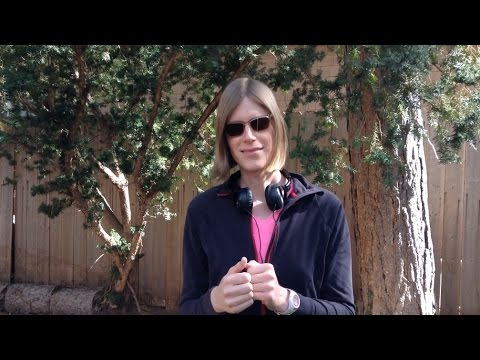

In [3]:
display(YouTubeVideo('lbV2SoeAggU'))

## Basic Signal Processing
-----------------------------------------------------------------------------------------------------------

The type of signal we're looking at today is a wave, specifically a sine wave. The terms and variables that we'll be working with are properties of the wave:

### Terms

_Amplitude_: Magnitude or extent. Loosely defined for our purposes as _volume_.

_Frequency_: The rate at which something occurs or is repeated over a given time. Loosely defined for our purposes as _pitch_.

_Sample rate_: The number of samples per second.

_Duration_ is probably self explanatory, but note in this case duration refers to the total length of a signal - one second, fifty seconds, etc., and should not be confused with the time extent of frequency or sample rate. Those variables are both measured per second.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Sine_and_Cosine.svg/720px-Sine_and_Cosine.svg.png">

Image courtesy of [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)

## Demonstration

Using the terms above as variables, let's define the properties of a sine wave. The sine wave will be rendered as audio and also plotted.

In [4]:
# Adapted from:
# Key, Alicia, "Synthetic akey7 [computer code]", accessed 2017-10-12, https://github.com/alicialink/synthetic-akey7.

amplitude = 0.5         # volume
frequency = 220.0       # pitch, in Hz
sample_rate = 44100     # samples per second, in Hz
duration = 10.0         # length of audio tone in seconds

# Create a NumPy array equal to the total number of samples over the specified duration
samples = np.arange(duration * sample_rate)

# Generate a sine wave using NumPy's 'sin' function
# (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sin.html)
sine_wave = np.sin(2 * np.pi * samples * frequency / sample_rate)

# The generated sine wave could be loud, so dampen amplitude as defined above
gain_controlled_wave = sine_wave * amplitude

# The following is needed to convert to audio
wave_as_int = np.int16(gain_controlled_wave * 32767)

### Play it!

Note that if we change parameteres above, we have to re-execute both code blocks in order to hear those changes here.

In [5]:
display(Audio(data=wave_as_int, rate=sample_rate))

### Plot it!

Note that this is not the same as the audio wave - we are leaving out a lot of samples!

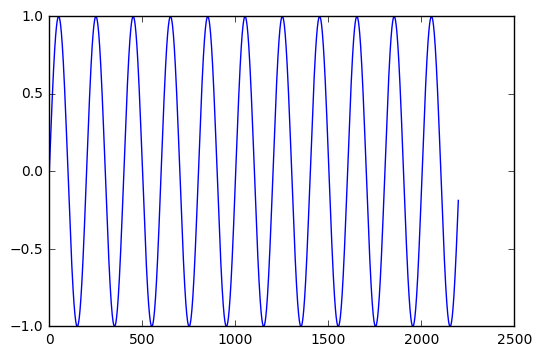

In [6]:
x = np.arange(frequency * duration)
y = np.sin(2 * np.pi * frequency * x / sample_rate)
plt.plot(x, y)
plt.show()

## Introducing widgets

In the above example, changes to the variables require re-execution of all of the corresponding code blocks. Using widgets allows us to change variable values interactively.

In [7]:
# Using the same code as above, create a function.
# Variables become parameters for the function.

# The function and widget code is adapted from "Exploring Beat Frequencies using the Audio Object"
# https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Beat%20Frequencies.ipynb

def draw(dur=5.0, freq=220.0, sr=44100):
    plt.figure(2)
    x = np.arange(freq * dur)
    y = np.sin(2 * np.pi * freq * x / sr)
    plt.plot(x, y)
    plt.show()

def render_sine(amp=5.0, sr=44100, dur=5.0, freq=220.0):
    samples = np.arange(dur * sr)
    wave = np.sin(2 * np.pi * samples * freq / sr)
    display(Audio(data=wave, rate=sr))
    draw(dur, freq, sr)
    return wave

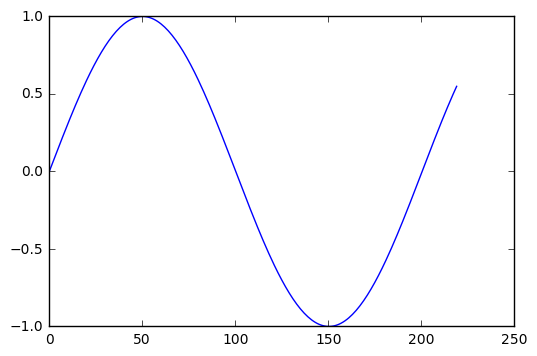

array([ 0.        ,  0.03133956,  0.06264832, ..., -0.09389555,
       -0.06264832, -0.03133956])

In [9]:
interactive_sine = interactive(render_sine, amp=widgets.IntSlider(min=1.0, max=10.0, step=1.0, description='Amplitude',continuous_update=False),
                        sr=widgets.RadioButtons(options=[44100, 48000, 88200, 96000], description='Sample Rate', continuous_update=False),
                        dur=widgets.IntSlider(min=1.0, max=5.0, description='Duration', continuous_update=False),
                        freq=widgets.IntSlider(min=220.0, max=440.0, step=1.0, description='Frequency', continuous_update=False))
display(interactive_sine)

# Add a modulator

In [10]:
# Using the same code as above, create a function.
# Variables become parameters for the function.

def addDraw(dur=5.0, freq=220.0, sr=44100):
    plt.figure(2)
    x = np.arange(freq * dur)
    y = np.sin(2 * np.pi * freq * x / sr)
    plt.plot(x, y)
    plt.show()

def additive_synth(amp=5.0, dur=5.0, freq=220.0, mod=0.0):
    sr = 44100
    samples = np.arange(dur * sr)
    carrier = np.sin(2 * np.pi * samples * freq / sr)
    modulator = np.sin(2 * np.pi * samples * mod / sr)
    wave = carrier + modulator
    display(Audio(data=wave, rate=sr))
    addDraw(dur, freq + mod, sr)
    return wave

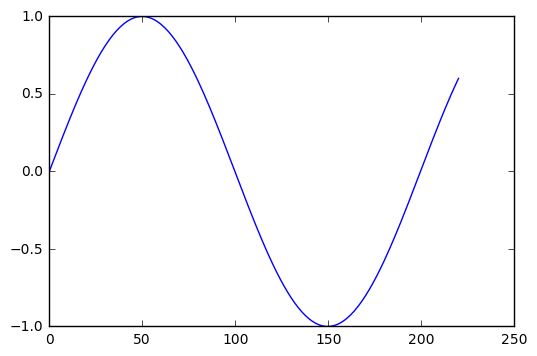

array([ 0.        ,  0.03148203,  0.06293328, ..., -0.09432297,
       -0.06293328, -0.03148203])

In [11]:
addZyn = interactive(additive_synth, amp=widgets.IntSlider(min=1.0, max=10.0, step=1.0, description='Amplitude',continuous_update=False),
                        dur=widgets.IntSlider(min=1.0, max=5.0, description='Duration', continuous_update=False),
                        freq=widgets.IntSlider(min=220.0, max=440.0, step=1.0, description='Frequency', continuous_update=False),
                     mod=widgets.IntSlider(min=1.0, max=440.0, step=1.0, description='Modulator', continuous_update=False))
display(addZyn)

# References & Resources
---------------------------------------------------------------------------------------------

Key, Alicia (2017-07-28). _Amplitude Modulation_. Retrieved 2017-10-12 from [https://youtu.be/WYNEjw4K3oM](https://youtu.be/WYNEjw4K3oM).

Key, Alicia (2017-04-24). _Python & NumPy Synthesizer 01: Sine wave audio with NumPy_. Retrieved 2017-10-12 from [https://youtu.be/lbV2SoeAggU](https://youtu.be/lbV2SoeAggU).

Key, Alicia (2017). Synthetic akey7 [computer softeware]. Retrieved 2017-10-12 from [https://github.com/alicialink/synthetic-akey7](https://github.com/alicialink/synthetic-akey7).

Project Jupyter (2017) ipywidgets: Interactive HTML Widgets [computer code]. Retrieved 2017-10-12 from [https://github.com/jupyter-widgets/ipywidgets](https://github.com/jupyter-widgets/ipywidgets)

Wikipedia. "Sine Wave," accessed 2017-10-12, [https://en.wikipedia.org/wiki/Sine_wave](https://en.wikipedia.org/wiki/Sine_wave).